In [3]:
from datetime import datetime, timedelta

import os

import numpy as np
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter('ignore')


###  ... data set age-standardized to the age-structure of California is shown in Figure 2

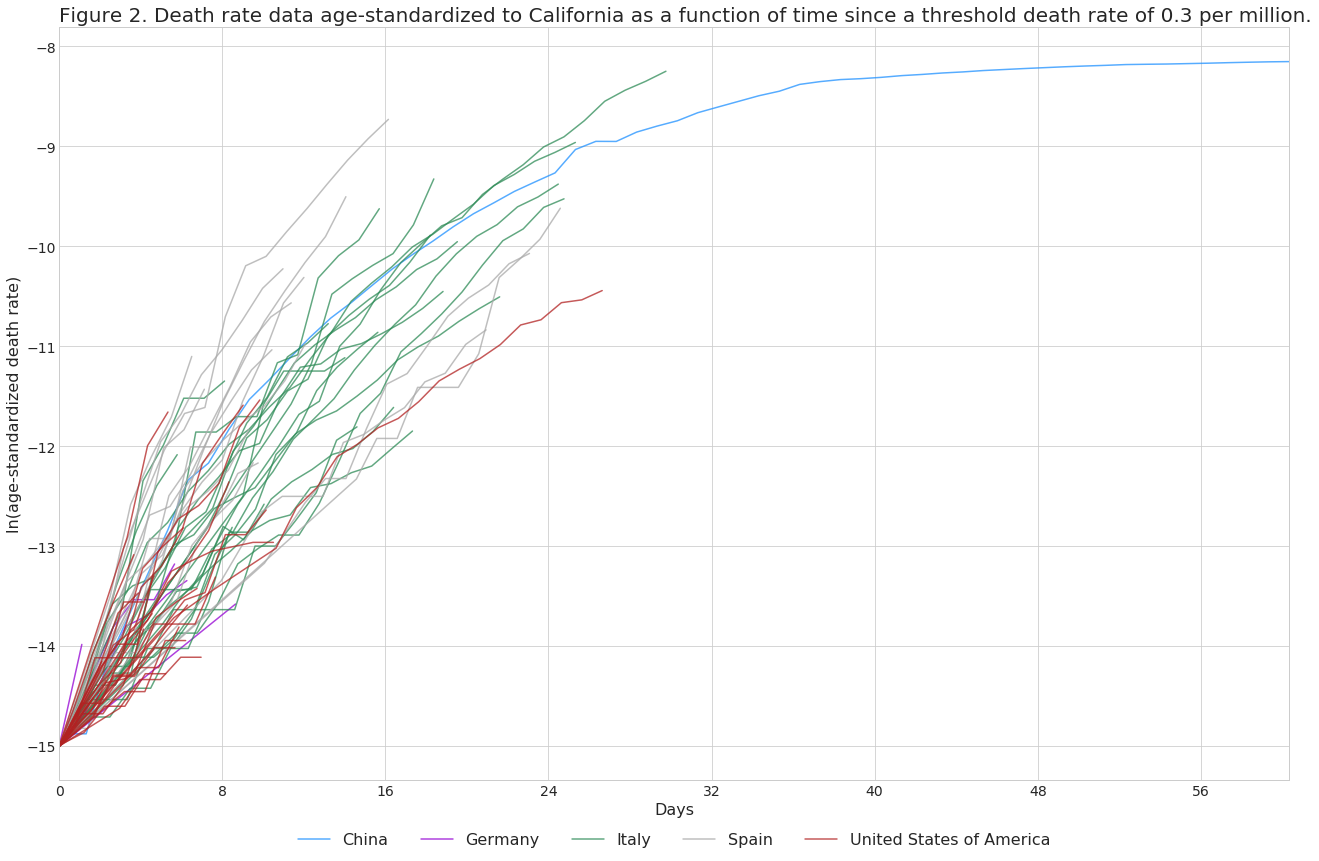

In [2]:
model_dir = '/ihme/code/rmbarber/covid_19_ihme/model_data/US_state_data_2020_03_29'
ca_df = pd.read_csv(f'{model_dir}/California.csv')

# do the plotting
fig, ax = plt.subplots(figsize=(20, 12))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ca_df = ca_df.sort_values(['Country/Region', 'Location', 'Days'])
labelled_countries = []
for location, country in ca_df[['Location', 'Country/Region']].drop_duplicates().values:
    if country == 'China':
        color = 'dodgerblue'
    elif country == 'United States of America':
        color = 'firebrick'
    elif country == 'Italy':
        color = 'seagreen'
    elif country == 'Spain':
        color = 'darkgrey'
    elif country == 'Germany':
        color = 'darkviolet'
    else:
        print('Unexpected country value')
    if country in labelled_countries:
        plt.plot(ca_df.loc[ca_df['Location'] == location, 'Days'],
                 ca_df.loc[ca_df['Location'] == location, 'ln(age-standardized death rate)'],
                 linestyle='-', alpha=0.75, color=color)
    else:
        plt.plot(ca_df.loc[ca_df['Location'] == location, 'Days'],
                 ca_df.loc[ca_df['Location'] == location, 'ln(age-standardized death rate)'],
                 label=country, linestyle='-', alpha=0.75, color=color)
        labelled_countries.append(country)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Days', fontsize=16)
plt.xlim(0, ca_df['Days'].max())
plt.ylabel('ln(age-standardized death rate)', fontsize=16)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5, fontsize=16)
plt.title('Figure 2. Death rate data age-standardized to California as a function of time since a threshold death rate of 0.3 per million.', 
          fontsize=20, loc='left')
plt.tight_layout()
plt.savefig('/ihme/code/rmbarber/covid_19_ihme/model_data/figure_2_ca_lnasdr_2020_03_29.pdf')


### Only 26 states have deaths greater than 0.31 per million (e-15) and were included in the model estimation along with data on XX other admin 1 locations.

In [11]:
model_dir = '/ihme/covid-19/deaths/prod/2020_04_04_US/model_data_equal_21'

states = [s[:-4] for s in os.listdir(model_dir) if s.endswith('.csv') and not s.endswith('covariate.csv')]

df = pd.concat([pd.read_csv(f'{model_dir}/{f}') for f in os.listdir(model_dir) if f.endswith('.csv') and not f.endswith('covariate.csv')])
df = df[['location_id', 'Location']].drop_duplicates()

# cov_df = pd.read_csv('/ihme/covid-19/social distancing/closure_criteria_covariate_scenarios_20200325.csv')
# cov_df = cov_df.rename(index=str, columns={'location':'Location'})
# cov_df = ca_df.merge(ca_df[['Location', 'Country/Region']].drop_duplicates(), how='left')
# assert not cov_df['Country/Region'].isnull().any(), 'Some location not in CA data.'
# print(len(cov_df.loc[cov_df['Country/Region'] != 'United States of America', ['Location', 'Country/Region']].drop_duplicates()))
# print(
#     len(cov_df.loc[(cov_df['Country/Region'] == 'United States of America') & ~(cov_df['Location'].str.endswith('WA')), 
#                    ['Location', 'Country/Region']].drop_duplicates()) + 1  # don't count WA subnats individually
# )


In [14]:
[i for i in states if i not in df['Location'].to_list()]
len([i for i in df['Location'].to_list() if i not in states])

55

### get new deaths (i.e., since 03/24)

In [19]:
# data = nCovid19Deaths()
# data.collect_data()
# obs_df = data.df[(data.df['Country/Region'] == 'United States of America') & (data.df['Province/State'] != '')]
obs_df.loc[obs_df['Date'] == datetime.strptime('2020-03-29', '%Y-%m-%d'), 'Deaths'].sum() - \
    (obs_df.loc[obs_df['Date'] == datetime.strptime('2020-03-24', '%Y-%m-%d'), 'Deaths'].sum() + 33.0 + 32.0)  # add life care and other counties, WA, which don't have a data point on the 24th

1730.0

In [22]:
obs_df.groupby('Province/State', as_index=False)['Deaths'].max().sort_values('Deaths', ascending=False)

,Province/State,Deaths
34,New York,965.0
32,New Jersey,161.0
20,Louisiana,151.0
18,King and Snohomish Counties (excluding Life Ca...,132.0
24,Michigan,132.0
4,California,124.0
10,Georgia,80.0
13,Illinois,66.0
9,Florida,56.0
23,Massachusetts,48.0
